In [1]:
from sklearn.datasets import load_diabetes


In [2]:
dataset = load_diabetes()

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
import pandas as pd

In [24]:
data = dataset['data']

In [30]:
X = pd.DataFrame(dataset['data'],columns = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'] )

In [31]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [28]:
y = pd.DataFrame(dataset['target'])

In [29]:
y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

<Axes: >

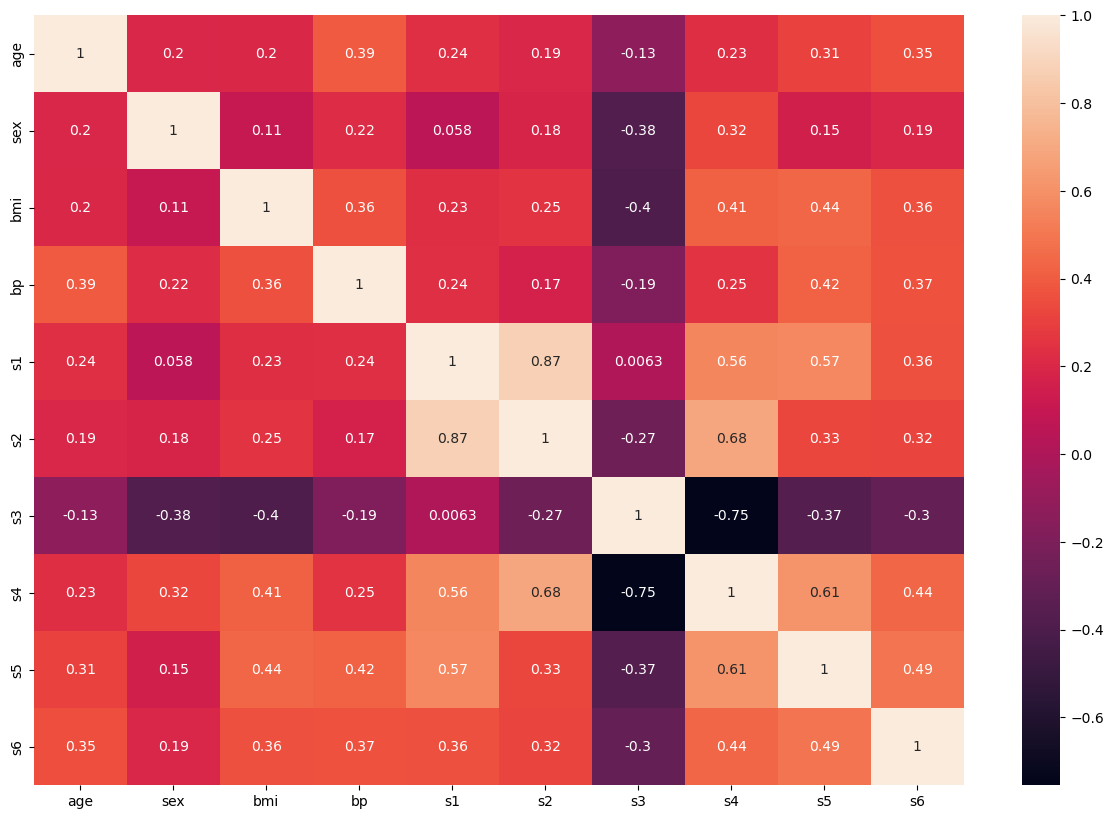

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
#hyperparameter tuning
param = {
    'criterion': ['squared_eror','friedman_mse','absolute_error'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
    
}

In [42]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(tree_reg,param_grid=param,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [43]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_eror, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criter

/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
450 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_paramet

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_eror', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [44]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [45]:
y_pred = grid.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)


In [48]:
print('mae: ',round(mae,2))
print('mse: ',round(mse,2))
print('r2_score: ',round(score,2))


mae:  52.04
mse:  4082.42
r2_score:  0.35


In [49]:
selected_model = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=2,max_features='sqrt',splitter='best')


In [50]:
selected_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt')

In [52]:
y_pred = selected_model.predict(X_test)

[Text(0.5, 0.8333333333333334, 'x[9] <= 0.034\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.5, 'x[3] <= 0.003\nfriedman_mse = 4530.568\nsamples = 241\nvalue = 136.029'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 3412.518\nsamples = 153\nvalue = 118.209'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 4962.443\nsamples = 88\nvalue = 167.011'),
 Text(0.75, 0.5, 'x[2] <= 0.005\nfriedman_mse = 5609.454\nsamples = 68\nvalue = 211.956'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 3532.832\nsamples = 29\nvalue = 155.828'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 3069.085\nsamples = 39\nvalue = 253.692')]

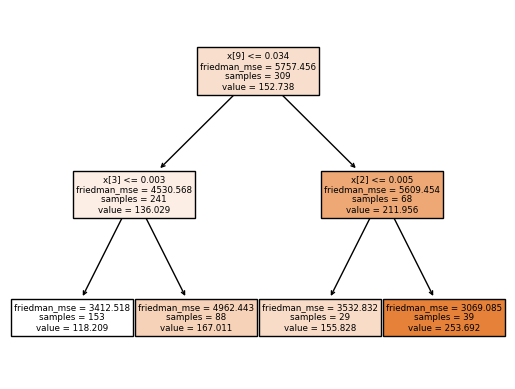

In [53]:
from sklearn import tree
tree.plot_tree(selected_model,filled=True)
